In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
log_paths = [
    # lr=3e-4
    'saves/230414_1808/logs/Fri_14_Apr_2023_22_14_39-l-10-m-7-x-6000.log',
    'saves/230414_1825/logs/Fri_14_Apr_2023_22_26_54-l-10-m-7-x-6000.log',
    'saves/230414_2035/logs/Sat_15_Apr_2023_00_42_58-l-10-m-7-x-6000.log',
    'saves/230414_2141/logs/Sat_15_Apr_2023_01_41_06-l-10-m-7-x-6000.log',
    # lr=1e-4
    'saves/230422_1815/logs/Sat_22_Apr_2023_22_17_14-l-10-m-7-x-6000.log',
    'saves/230422_1826/logs/Sat_22_Apr_2023_22_28_45-l-10-m-7-x-6000.log',
    'saves/230414_2040/logs/Sat_15_Apr_2023_00_50_44-l-10-m-7-x-6000.log',
    'saves/230414_2215/logs/Sat_15_Apr_2023_02_16_07-l-10-m-7-x-6000.log',

    'saves/230422_1949/logs/Sat_22_Apr_2023_23_49_20-l-10-m-7-x-6000.log',
    'saves/230422_1912/logs/Sat_22_Apr_2023_23_22_23-l-10-m-7-x-6000.log',
    'saves/230422_1930/logs/Sat_22_Apr_2023_23_31_09-l-10-m-7-x-6000.log'
]


In [3]:
# Read the log file into a list of strings
def analyze_logs(filename):

    with open(filename, 'r') as f:
        log_lines = f.readlines()

    # Extract the relevant information from the log lines
    data = []
    for line in log_lines:
        if not line.startswith('#'):
            continue
        line = line[1:]  # Remove '#' at the beginning
        fields = line.split('|')
        entry = {
            'steps': int(fields[1].strip().split(':')[-1]),
            'steps_t': int(fields[2].strip().split(':')[-1]),
            't': float(fields[3].strip().split(':')[-1]),
            'r': float(fields[4].strip().split(':')[-1]),
            'e': float(fields[5].strip().split(':')[-1]),
            'Q': float(fields[6].strip().split(':')[-1]),
            'won': fields[7].strip().split(':')[-1].lower().strip() == 'true',
        }
        data.append(entry)


    # Create a Pandas DataFrame from the extracted data
    df = pd.DataFrame(data)
    df = df.dropna()
    df['steps_diff'] = df['steps'].diff()

    rolling_q_score = df['Q'].rolling(window=100).mean()
    rolling_r_score = df['r'].rolling(window=100).mean()
    rolling_won_rate = (df['won'].astype(int)).rolling(window=100).mean()
    rolling_steps = df['steps_diff'].rolling(window=100).mean()


    # Create a figure with 3 subplots, sharing the x-axis
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(8, 10))

    # Plot index vs rolling q score on the first subplot
    ax1.plot(df.index, rolling_q_score, label='Rolling q Score (window=100)')
    ax1.set_ylabel('q Score')
    ax1.legend()

    # Plot index vs rolling r score on the second subplot
    ax2.plot(df.index, rolling_r_score, label='Rolling r Score (window=100)')
    ax2.set_ylabel('r Score')
    ax2.legend()

    # Plot index vs rolling won rate on the third subplot
    ax3.plot(df.index, rolling_won_rate, label='Rolling Win Rate (window=100)')
    ax3.set_xlabel('Index')
    ax3.set_ylabel('Win Rate')
    ax3.legend()

    # Plot index vs rolling steps diff on the fourth subplot
    ax4.plot(df.index, rolling_steps, label='Rolling Steps (window=100)')
    ax4.set_xlabel('Index')
    ax4.set_ylabel('Steps')
    ax4.legend()

    # Add a title for the entire figure
    fig.suptitle('Rolling q Score, Rolling r Score, Rolling Win Rate, and Rolling Steps (window=100)')

    # Adjust spacing between subplots
    plt.subplots_adjust(hspace=0.3)

    # Show the plot
    plt.show()

    # print(df)

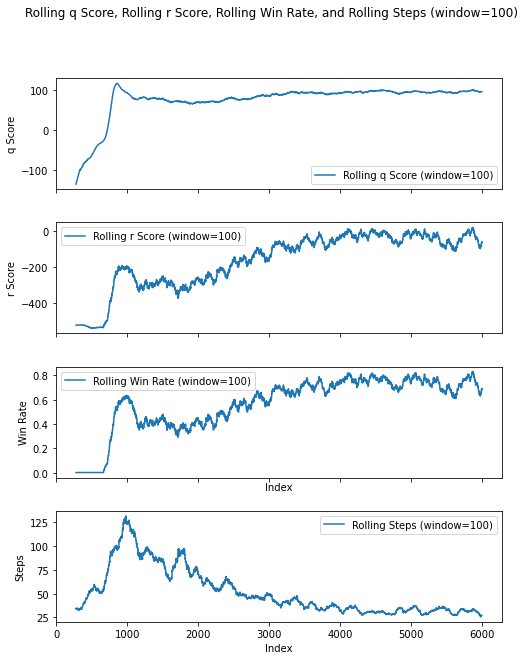

In [4]:
analyze_logs(log_paths[0])  # random ghosts

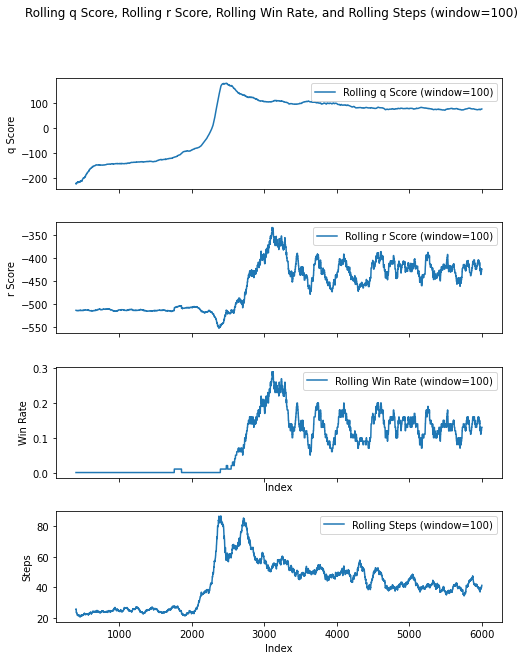

In [5]:
analyze_logs(log_paths[1])  # ghosts with attack = 0.6

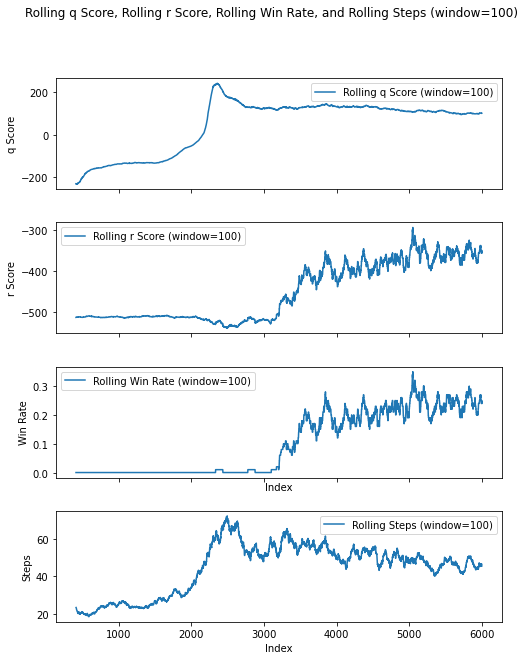

In [6]:
analyze_logs(log_paths[2])  # ghosts with attack = 0.7

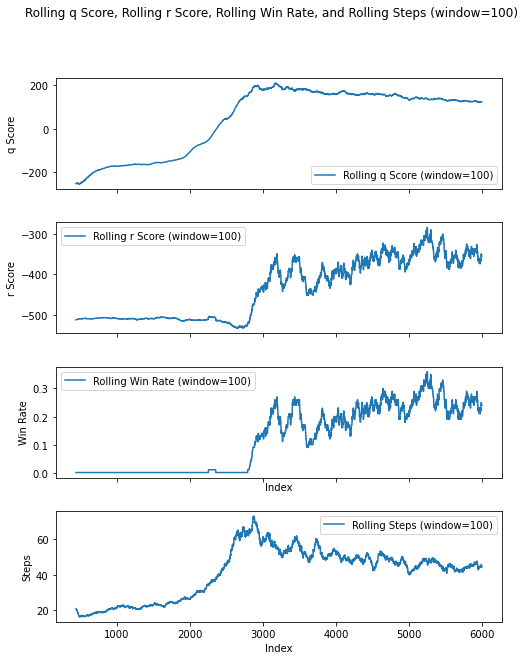

In [7]:
analyze_logs(log_paths[3])  # ghosts with attack = 0.8

saves/230422_1815/logs/Sat_22_Apr_2023_22_17_14-l-10-m-7-x-6000.log


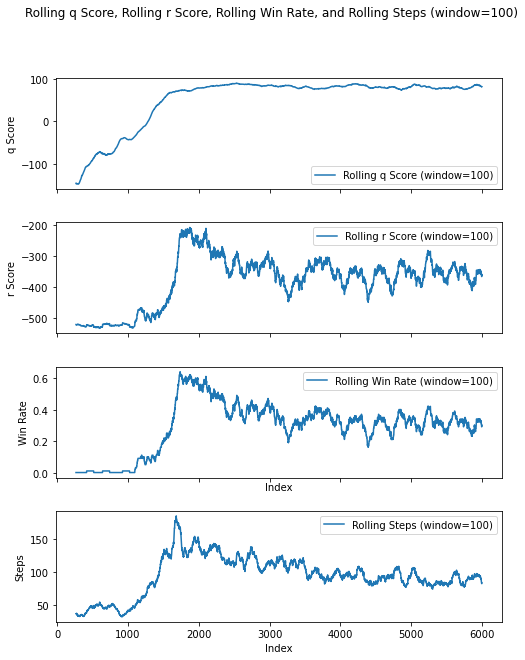

In [8]:
print(log_paths[4])
analyze_logs(log_paths[4])  # ghosts with random attack, lr=1e-4

saves/230422_1826/logs/Sat_22_Apr_2023_22_28_45-l-10-m-7-x-6000.log


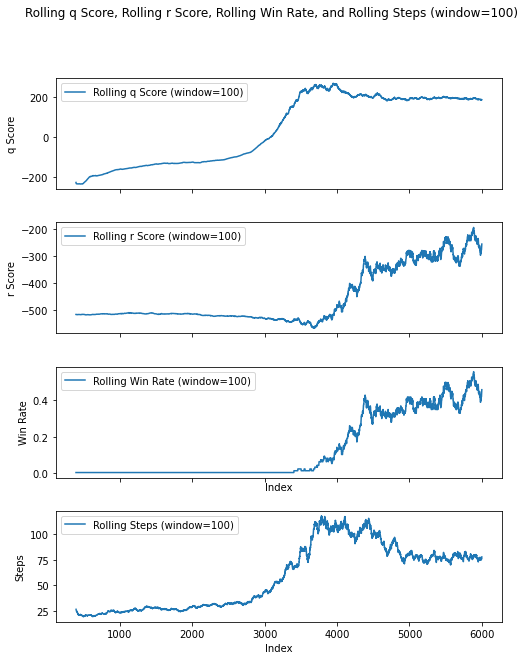

In [9]:
print(log_paths[5])
analyze_logs(log_paths[5]) # ghosts with attack=0.6, lr=1e-4

saves/230414_2040/logs/Sat_15_Apr_2023_00_50_44-l-10-m-7-x-6000.log


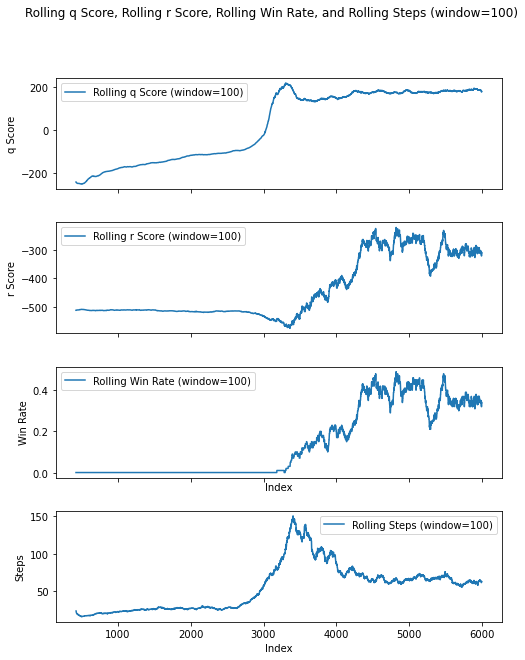

In [10]:
print(log_paths[6])
analyze_logs(log_paths[6]) # ghosts with attack=0.7, lr=1e-4

saves/230414_2215/logs/Sat_15_Apr_2023_02_16_07-l-10-m-7-x-6000.log


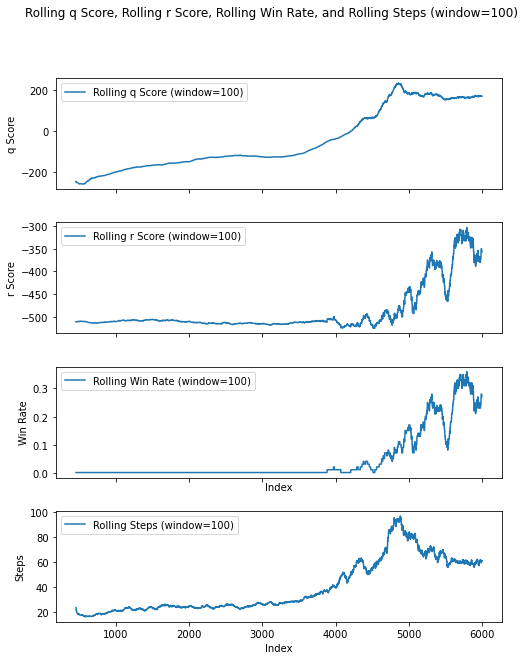

In [11]:
print(log_paths[7])
analyze_logs(log_paths[7])  # ghost attack = 0.8, lr=1e-4

In [12]:
import glob
directory_path = "./logs"

# Use glob to get all files with .log extension in the directory
log_files = sorted(glob.glob(directory_path + "/*.log"))

# Print the list of log files
print(log_files)

['./logs/Sun_23_Apr_2023_15_09_37-l-10-m-7-x-1.log', './logs/Sun_23_Apr_2023_15_10_00-l-10-m-7-x-1.log', './logs/Sun_23_Apr_2023_15_10_18-l-10-m-7-x-1.log', './logs/Sun_23_Apr_2023_15_10_40-l-10-m-7-x-1.log', './logs/Sun_23_Apr_2023_15_10_58-l-10-m-7-x-1.log', './logs/Sun_23_Apr_2023_15_12_55-l-10-m-7-x-1.log', './logs/Sun_23_Apr_2023_15_14_50-l-10-m-7-x-1.log', './logs/Sun_23_Apr_2023_15_15_46-l-10-m-7-x-1.log', './logs/Sun_23_Apr_2023_15_17_29-l-10-m-7-x-1.log', './logs/Sun_23_Apr_2023_15_18_08-l-10-m-7-x-1.log', './logs/Sun_23_Apr_2023_15_19_25-l-10-m-7-x-1.log', './logs/Sun_23_Apr_2023_15_20_46-l-10-m-7-x-1.log', './logs/Sun_23_Apr_2023_15_21_28-l-10-m-7-x-1.log', './logs/Sun_23_Apr_2023_15_22_12-l-10-m-7-x-1.log', './logs/Sun_23_Apr_2023_15_22_48-l-10-m-7-x-1.log', './logs/Sun_23_Apr_2023_15_25_52-l-10-m-7-x-1.log', './logs/Sun_23_Apr_2023_15_27_13-l-10-m-7-x-1.log', './logs/Sun_23_Apr_2023_15_27_57-l-10-m-7-x-1.log', './logs/Sun_23_Apr_2023_15_28_36-l-10-m-7-x-1.log', './logs/Sun

In [13]:
results = []
model_results = []

# Iterate through each log file
for i, log_file in enumerate(log_files):
    total_games = 0
    total_wins = 0
    with open(log_file, 'r') as file:
        # Read the file line by line
        for line in file:

            # print(line)
            # Check if the line contains "won: True" or "won: False"
            if "won: True" in line:
                total_games += 1
                total_wins += 1
                # print(total_wins)
            elif "won: False" in line:
                total_games += 1

    # Print the win rate for the current file
    win_rate = total_wins / total_games if total_games > 0 else 0
    # print(total_games)
    model_results.append(win_rate)
    print(f"{win_rate:.2%}", end=", ")

    # Print a line break after every 5th file
    if (i + 1) % 5 == 0:
        results.append(model_results)
        model_results = []
        print("\n")

print(results)
# Print the overall win rate
# overall_win_rate = total_wins / total_games if total_games > 0 else 0
# print(f"\nOverall Win Rate: {overall_win_rate:.2%}")

77.80%, 48.20%, 38.20%, 33.80%, 27.60%, 

56.60%, 23.00%, 16.80%, 16.80%, 9.00%, 

58.60%, 30.60%, 27.60%, 20.20%, 17.40%, 

65.80%, 46.40%, 39.00%, 30.40%, 29.00%, 

[[0.778, 0.482, 0.382, 0.338, 0.276], [0.566, 0.23, 0.168, 0.168, 0.09], [0.586, 0.306, 0.276, 0.202, 0.174], [0.658, 0.464, 0.39, 0.304, 0.29]]


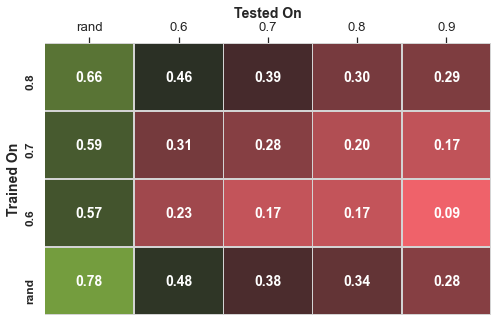

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Mock data for the 2D array (replace with your actual data)
# ...

# Create a list of custom labels for the x-axis and y-axis
x_labels = ['rand', 0.6, 0.7, 0.8, 0.9]
y_labels = ['rand', 0.6, 0.7, 0.8]

# Convert the 2D array to a list of lists for heatmap plotting
data = [list(row) for row in results]

# Set the font to be more readable
plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(8, 5))

# Create a seaborn heatmap with custom labels
sns.set(font_scale=1.2)  # Set font scale for larger labels
cmap = sns.diverging_palette(10, 110, s=80, l=60, n=256, center='dark', as_cmap=True)  # Define color map
ax = sns.heatmap(
    data,
    annot=True,
    fmt=".2f",  # Display values with two decimal points
    cmap=cmap,
    cbar=False,
    xticklabels=x_labels,
    yticklabels=y_labels,
    linewidths=0.5,
    linecolor="lightgray",
    annot_kws={"size": 14, "weight": "bold"},
)

ax.set_xlabel("Tested On", fontsize=14, fontweight="bold")  # Set x-axis label
ax.set_ylabel("Trained On", fontsize=14, fontweight="bold")  # Set y-axis label
ax.invert_yaxis()  # Reverse y-axis
plt.xticks(fontsize=12, fontweight="bold")  # Set x-axis tick labels font size and weight
plt.yticks(fontsize=12, fontweight="bold")  # Set y-axis tick labels font size and weight
ax.xaxis.tick_top()  # Move x-axis ticks to top
ax.xaxis.set_label_position("top")  # Move x-axis label to top
ax.set_facecolor("lightgray")  # Set background color of the plot
plt.grid(color="white", linewidth=0.5)  # Set grid line color to lighter gray

# Show the plot
plt.show()

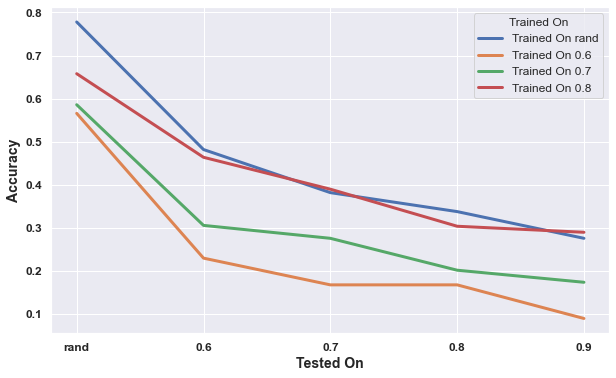

In [15]:
import matplotlib.pyplot as plt

data

x_labels = ['rand', 0.6, 0.7, 0.8, 0.9]
y_labels = ['rand', 0.6, 0.7, 0.8]

# Set the font to be more readable
plt.rcParams["font.family"] = "Arial"
plt.figure(figsize=(10, 6))

# Create a line graph for each row in the data
for i, row in enumerate(data):
    plt.plot(x_labels, row, label=f"Trained On {y_labels[i]}", linewidth=3)

plt.xlabel("Tested On", fontsize=14, fontweight="bold")
plt.ylabel("Accuracy", fontsize=14, fontweight="bold")
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")
plt.legend(title="Trained On", title_fontsize=12, loc="upper right", fontsize=12)

# Show the plot
plt.show()